In [45]:
# Insert the directory
import sys
sys.path.insert(0,'/content/helper')

In [52]:
from helper import helper

In [47]:
import pandas as pd
df = pd.read_csv("/content/breast-cancer.csv")
df.head()

In [54]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

Veryfying if the dataset is imbalanced

    Count of each class in the dataset:
      Class "B": 357
      Class "M": 212
    The total number of samples is 357 + 212 = 569.

  Now, let's calculate the proportion of each class:

    Proportion of class "B":
      357/569 ≈ 0.627
    Proportion of class "M":
      212 / 569 = 0.373

In this case, the class distribution is not perfectly balanced because the proportion of class "B" is approximately 0.627 while the proportion of class "M" is approximately 0.373. However, the dataset is not severely imbalanced either. Typically, a balanced dataset would have classes with roughly equal proportions, but slight imbalances are common and may not significantly affect model performance depending on the specific task and algorithms used. Hence, for this use case dataset will be treated as a balanced dataset.

In [55]:
# Import necessary modules for data preprocessing
from sklearn.preprocessing import StandardScaler  # For feature scaling
from sklearn.model_selection import train_test_split  # For splitting the dataset into training and testing sets

# X contains the features (all columns except the 'diagnosis' column)
X = df.drop("diagnosis", axis=1)
# y contains the labels (only the 'diagnosis' column)
y = df["diagnosis"]

# Split the dataset into training and testing sets
# random_state=0 ensures reproducibility of the results
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Initialize StandardScaler for feature scaling
scalar = StandardScaler()

# Fit the StandardScaler to the training data
scalar.fit(X_train)

# Transform the training and testing data using the fitted StandardScaler
# This scales each feature to have a mean of 0 and a standard deviation of 1
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)

## Decision trees

- Validation curves for at least two hyperparameters
 - Pruning is a required hyperparameter
 - Vary hyperparameter of interest keeping all other optimal hyperparameters fixed and train the models and plot the curves
 - bias and variance / overfit and underfit analysis
- Tune model to be optimal (GridSearch allowed)
- Learning Curve plot and analysis
 - Keep the optimal hyperparameter choice . Vary the training data set size , train models with data and plot the curves
 - bias and variance / overfit and underfit analysis
 - Add intermidate learning or validation curve to show suboptimal performance and analysis
- Link back results to some algorithmic behavior, hyperparameter interaction between the algorithm and input data, etc
- Document wall clock times

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score


### Hyperparameter tuning

Pruning
 - Post pruning using cost complexity pruning
 - Prepruning by varying the max_depth parameter which varies the maximum depth of the tree

In [67]:
# Post pruning using cost complexity pruning

# Create an Decision Tree classifier with a radial basis function (RBF) kernel
clf = DecisionTreeClassifier(random_state = 0)

# Find the ccp_alpha values
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Define the hyperparameter name
param_name = "ccp_alpha"

# List of values to be explored for the hyperparameter
param_values = ccp_alphas

# Use a helper function 'train_clfs_with_hyperparameters' to train classifiers with different hyperparameter values
# DecisionTreeClassifier is the classifier being used
# 'param_name' is the name of the hyperparameter being tuned
# 'param_values' is the list of values to be explored for the hyperparameter
# 'X_train' is the training data
# 'y_train' is the corresponding labels

dct_clfs_ccp = helper.train_clfs_with_hyperparameters(DecisionTreeClassifier, param_name, param_values, X_train, y_train)

In [68]:
# Prepruning by varying the max_depth parameter which varies the maximum depth of the tree

# Define the hyperparameter name
param_name = "max_depth"

# List of values to be explored for the hyperparameter
param_values = list(range(1, 9))

dct_clfs_depth = helper.train_clfs_with_hyperparameters(DecisionTreeClassifier, param_name, param_values, X_train, y_train)

### Plotting training and testing accuracies for bias and variance / overfit and underfit analysis

In [70]:
# Calculate training scores for classifiers trained with different ccp_alpha values
# 'dct_clfs_ccp' a dictionary containing classifiers trained with different ccp_alpha values
# List comprehension is used to iterate over each classifier in the dictionary and calculate its training score
# The score is calculated using the 'score' method of each classifier on the training data (X_train, y_train)
train_scores_ccp = [clf.score(X_train, y_train) for clf in dct_clfs_ccp]

# Calculate test scores for classifiers trained with different ccp_alpha values
# Similar to training scores calculation but using the testing data (X_test, y_test)
test_scores_ccp = [clf.score(X_test, y_test) for clf in dct_clfs_ccp]

# Calculate training scores for classifiers trained with different maximum depth values
# 'dct_clfs_depth' a dictionary containing classifiers trained with different maximum depth values
# Similar to the calculation of training scores for ccp_alpha, but using a different set of classifiers
train_scores_depth = [clf.score(X_train, y_train) for clf in dct_clfs_depth]

# Calculate test scores for classifiers trained with different maximum depth values
test_scores_depth = [clf.score(X_test, y_test) for clf in dct_clfs_depth]

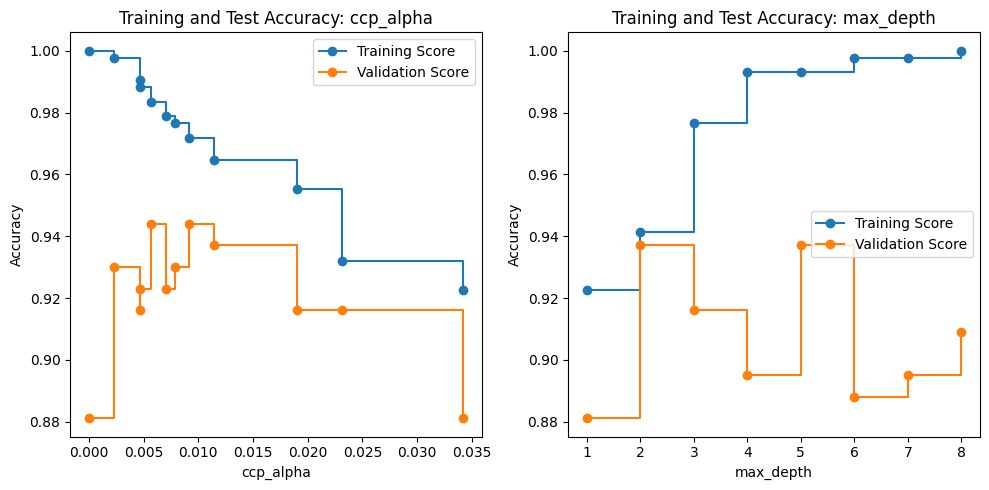

In [74]:
# Combine training scores for classifiers with different hyperparameter values
train_scores = [train_scores_ccp[:-1], train_scores_depth]

# Combine test scores for classifiers with different hyperparameter values
test_scores = [test_scores_ccp[:-1], test_scores_depth]

# Define the names of the hyperparameters being tuned
param_names = ["ccp_alpha", "max_depth"]

# Define the range of hyperparameter values being explored
params = [ccp_alphas[:-1], list(range(1, 9))]

# Use a helper function 'plot_train_test_metrics' to visualize the training and test scores
# 'train_scores' and 'test_scores' contain the scores for each hyperparameter
# 'params' contains the range of values for each hyperparameter
# 'param_names' contains the names of the hyperparameters
# 'scoring' parameter specifies the scoring metric used for evaluation (e.g., 'Accuracy')
helper.plot_train_test_metrics(train_scores, test_scores, params, param_names, scoring='Accuracy')

### Tuning Model using GridSearch

In [77]:
# Define the names of the hyperparameters being tuned
param_names = ["ccp_alpha", "max_depth"]

# Define the range of hyperparameter values being explored
params = [ccp_alphas, list(range(1, 9))]

# Use a helper function 'grid_search_func' to perform grid search over hyperparameters
# DecisionTreeClassifier() creates a Decision Tree classifier object
# 'params' contains the range of values for each hyperparameter
# 'param_names' contains the names of the hyperparameters
# 'cv=5' specifies 5-fold cross-validation for evaluation
# 'scoring='accuracy'' specifies that the 'accuracy' metric will be used for evaluation
# 'X_train', 'X_test', 'y_train', and 'y_test' contain the training and testing data
best_params = helper.grid_search_func(DecisionTreeClassifier(), params, param_names,
                     cv=5, scoring='accuracy',
                     X_train=X_train, X_test=X_test,
                     y_train=y_train, y_test=y_test)


Best parameters: {'ccp_alpha': 0.004659799593581376, 'max_depth': 7}
Test accuracy: 0.9230769230769231


DecisionTreeClassifier time: 1.5967 seconds
DecisionTreeClassifier time: 0.1064 seconds


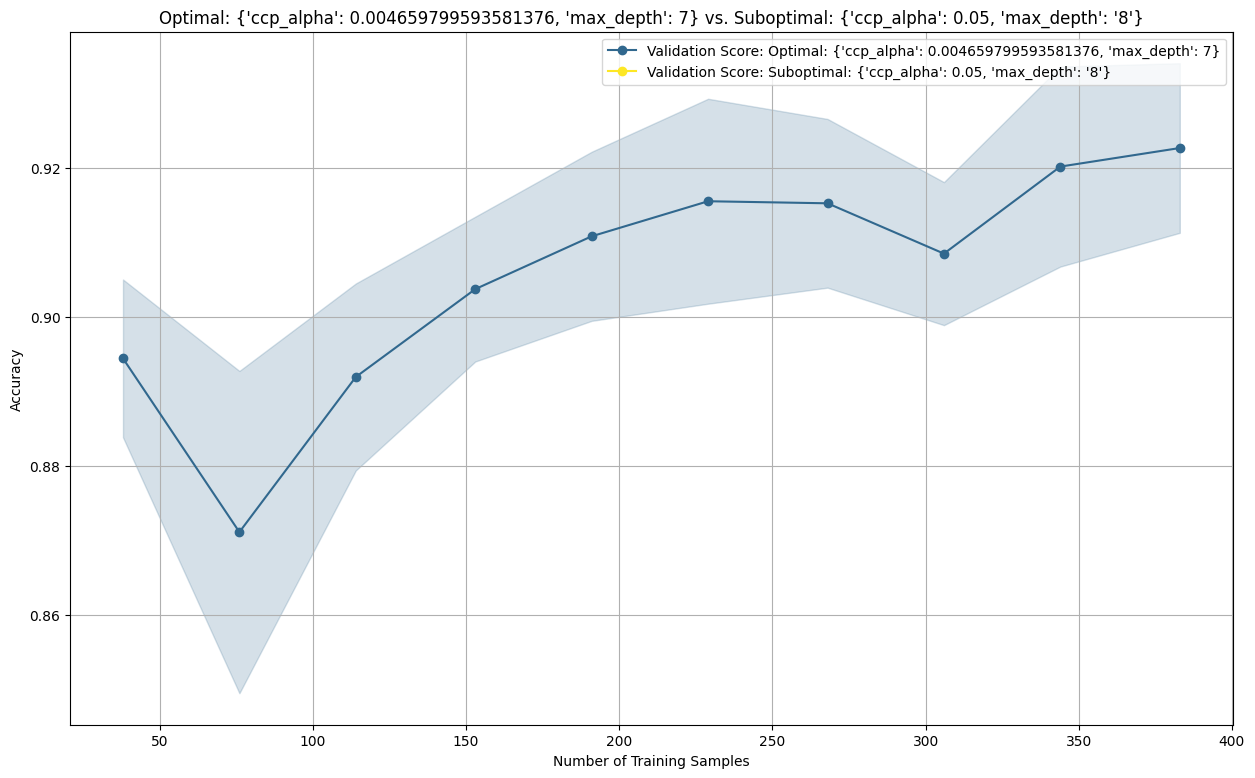

In [79]:
suboptimal_params = {'ccp_alpha': 0.05,
                    'max_depth': "8"}
helper.plot_learning_curves(X_train, X_test, y_train, y_test,
                     clfs = [DecisionTreeClassifier(**best_params),
                             DecisionTreeClassifier(**suboptimal_params)],
                             names = [f"Optimal: {best_params}", f"Suboptimal: {suboptimal_params}"],
                     plot_train = False,
                     cv = 10)

In [50]:
from sklearn.neural_network import MLPClassifier

In [53]:
param_name = "hidden_layer_sizes"
param_values = [[100 for _ in range(i)] for i in range(1, 10)]
nn_layers_clfs = helper.train_clfs_with_hyperparameters(MLPClassifier, param_name, param_values, X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [9]:
param_name = "activation"
param_values = ['identity', 'logistic', 'tanh', 'relu']
nn_activation_clfs = helper.train_clfs_with_hyperparameters(MLPClassifier, param_name, param_values, X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [29]:
train_scores_activation = [clf.score(X_train, y_train) for clf in nn_activation_clfs]
test_scores_activation = [clf.score(X_test, y_test) for clf in nn_activation_clfs]

train_scores_layers = [clf.score(X_train, y_train) for clf in nn_layers_clfs]
test_scores_layers = [clf.score(X_test, y_test) for clf in nn_layers_clfs]

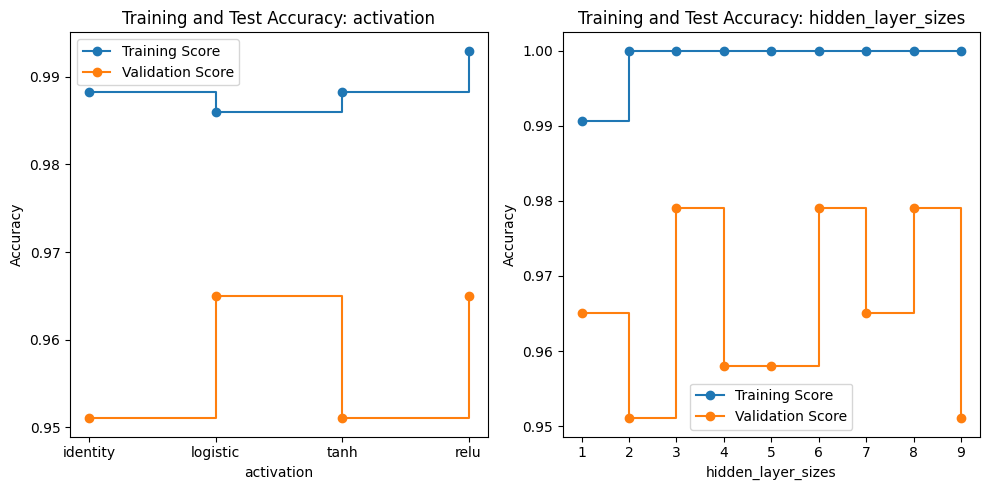

In [41]:
train_scores = [train_scores_activation, train_scores_layers]
test_scores = [test_scores_activation, test_scores_layers]
param_names = ["activation", "hidden_layer_sizes"]
params = [['identity', 'logistic', 'tanh', 'relu'], list(range(1, 10))]
helper.plot_train_test_metrics(train_scores, test_scores, params, param_names, scoring = 'Accuracy')

In [ ]:
.